<a href="https://colab.research.google.com/github/Muhammad-kaif2/machine_learning_Feature_eng/blob/main/outlier_Z_score_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Z_Score**
-- stander distribution par use ho ga


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv'
df = pd.read_csv(url)
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [ ]:
df.shape

(1000, 3)

In [ ]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


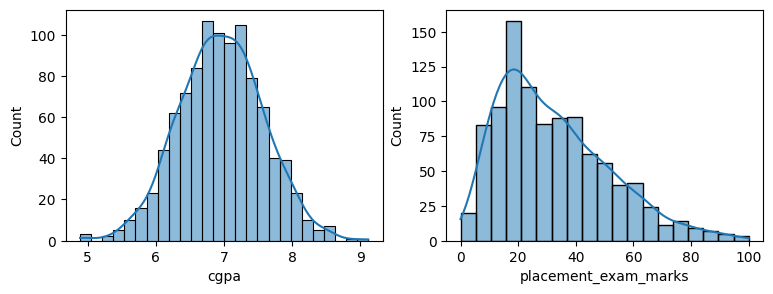

In [ ]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.show()

In [ ]:
print(df['cgpa'].mean() + 3*df['cgpa'].std())
print(df['cgpa'].mean() - 3*df['cgpa'].std())

8.808933625397168
5.113546374602832


In [ ]:
new_df = df[(df['cgpa'] > 8.80) | (df['cgpa'] <  5.11)]
new_df

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [ ]:
# Calculating the Zscore
from scipy.stats import zscore
df['zscore'] = zscore(df['cgpa'])
df.head()

,cgpa,placement_exam_marks,placed,zscore
0,7.19,26.0,1,0.371611
1,7.46,38.0,1,0.810215
2,7.54,40.0,1,0.940171
3,6.42,8.0,1,-0.879222
4,7.23,17.0,0,0.436589


In [ ]:
df.shape

(1000, 4)

In [ ]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [ ]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [ ]:
df.shape

(1000, 4)

In [ ]:
df.describe()

,cgpa,placement_exam_marks,placed,zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.465494e-16
std,0.612688,19.130822,0.500129,1.000500e+00
min,5.113546,0.000000,0.000000,-3.364643e+00
25%,6.550000,17.000000,0.000000,-6.680422e-01
50%,6.960000,28.000000,0.000000,-2.014328e-03
75%,7.370000,44.000000,1.000000,6.640135e-01
max,8.808934,100.000000,1.000000,3.506815e+00


**IQR**


---
standered daviation skew ho ga






<Axes: xlabel='placement_exam_marks'>

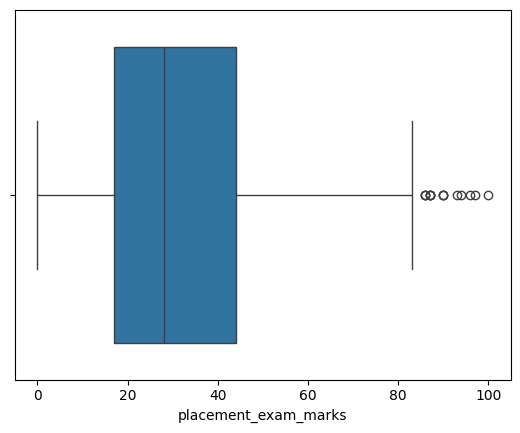

In [ ]:
sns.boxplot(df['placement_exam_marks'],orient='h')

In [ ]:
# using IQR
percentile_25 = df['placement_exam_marks'].quantile(0.25)
print(percentile_25)
percentile_75 = df['placement_exam_marks'].quantile(0.75)
print(percentile_75)

17.0
44.0


In [ ]:
iqr = percentile_75 - percentile_25
print(iqr)

27.0


In [ ]:
upper_limit1 = percentile_75 + 1.5*iqr
lower_limit1 = percentile_25 - 1.5*iqr

In [ ]:
df['placement_exam_marks'] = np.where(
    df['placement_exam_marks']>upper_limit1,
    upper_limit1,
    np.where(df['placement_exam_marks']<lower_limit1,
             lower_limit,df['placement_exam_marks']))

In [ ]:
df.shape

(1000, 4)

In [ ]:
df.describe()

,cgpa,placement_exam_marks,placed,zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.136500,0.489000,-1.465494e-16
std,0.612688,18.865419,0.500129,1.000500e+00
min,5.113546,0.000000,0.000000,-3.364643e+00
25%,6.550000,17.000000,0.000000,-6.680422e-01
50%,6.960000,28.000000,0.000000,-2.014328e-03
75%,7.370000,44.000000,1.000000,6.640135e-01
max,8.808934,84.500000,1.000000,3.506815e+00


**BEFORE_Outlier**

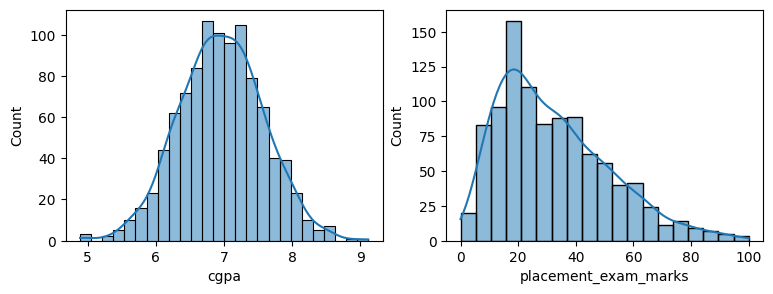

In [ ]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.show()

**After_handel_outlier**

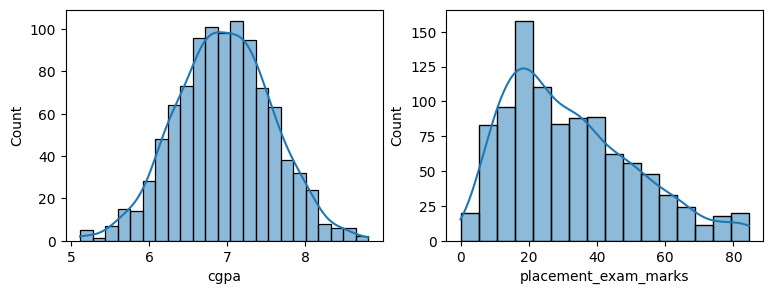

In [ ]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.show()